#### Analysis of the phase transition of the Quantum Ising chain with 2nn and J1=J2<0

#### Imports

In [2]:
import matplotlib.pyplot as plt
import numpy as np

#### Data

In [3]:


# hmax configuration
hs = [0.1, 1.2, 2.26, 3.3, 4.4, 5.5, 6.6, 7.7, 8.8, 9.8, 10.9, 12.0]

x = {}
z = {}
corr={}

for h in hs:
    data = np.load(f"data/dmrg_2nn/test_unet_periodic_2nn_l_128_h_{h}_ndata_100.npz")
    x[h] = data["magnetization_x"]
    z[h] = data["density"]
    corr[h]=data['correlation']

#### Study the Magnetization

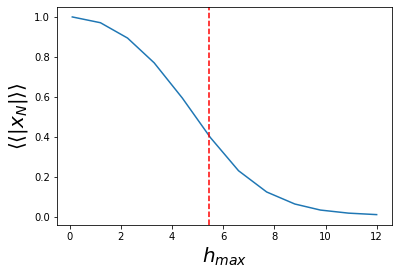

In [4]:
u4 = []
m2 = []
for h in hs:

    m2.append(np.average(np.average(np.abs(x[h]), axis=-1) ** 2))
    lnm4 = np.log(np.average(x[h] ** 4, axis=-1))
    lnm2 = np.log(np.average(x[h] ** 2, axis=-1))
    lambd = lnm4 - 2 * lnm2
    y = 0.5 * (3 - np.exp(lambd))
    u4.append(np.average(y))
    
plt.plot(hs,m2)
plt.xlabel(r'$h_{max}$',fontsize=20)
plt.ylabel(r'$\langle \langle{|x_N|} \rangle \rangle$',fontsize=20)
plt.axvline(x=2*np.e,label=r'$2 \cdot h_{c,1nn}$',color='red',linestyle='--')

#### Correlation Analysis

##### a) Convert the matrix in the c_i,i+r form

In [10]:
l=128 #size of the system
i=np.arange(l)
g={}
for h in hs:
    for j in range(0,l):
        m = corr[h][:, i, (i + j) % l]
        if j == 0:
            ms = m.reshape(-1, 1, l)
        else:
            ms = np.append(ms, m.reshape(-1, 1, l), axis=-2)
    s=ms
    s=np.average(s,axis=-1)
    g[h]=s

##### b) Compute the average and see the log-log behaviour at different h_max

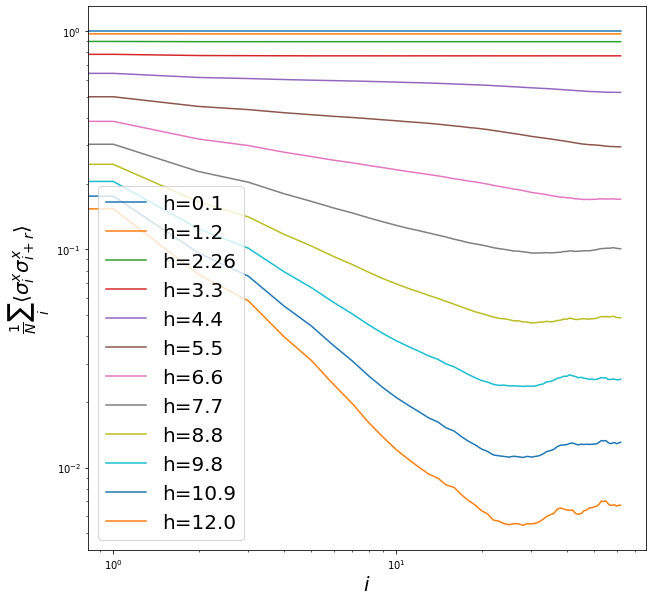

In [21]:
plt.figure(figsize=(10,10))
for h in hs:
    plt.plot(np.average(g[h],axis=0)[1:64],label=f'h={h}')
plt.legend(fontsize=20)
plt.loglog()
plt.xlabel(r'$i$',fontsize=20)
plt.ylabel(r'$\frac{1}{N}\sum_i \langle \sigma^{x}_i \sigma^{x}_{i+r} \rangle$',fontsize=20)
plt.show()